# Study of the chirality of the system

In this notebook, I will try to assign to each pentagon a certain degree of chirality. The idea is to use the directions of the spins in order to generate an order parameter that will define the chirality.

In [113]:
import magcolloids as mgc
import os
import sys
import numpy as np
import pandas as pd
from multiprocessing import Pool
import tqdm.auto as tqdm

sys.path.insert(0, '../icenumerics')

import icenumerics as ice
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-8.1"

In [5]:
load_obj = mgc.trj_lazyread(os.path.join(data_directory,
                                         "ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0.lammpstrj"),
                                            output = ["x","y","z","mux","muy","muz"]) 

bnd = load_obj.get_bounds()
trj = load_obj.read_trj()
col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])

In [60]:
trj

type           x           y    z     mux     muy  muz
frame  id                                                          
0      1        1    0.000000    2.262900  0.0  0.0000  0.0000  0.0
       2        1    6.535400   13.546100  0.0  0.0000  0.0000  0.0
       3        1   -6.535400   13.546100  0.0  0.0000  0.0000  0.0
       4        1    6.535400  -13.546100  0.0  0.0000  0.0000  0.0
       5        1  -15.195700  -18.546101  0.0  0.0000  0.0000  0.0
...           ...         ...         ...  ...     ...     ...  ...
250000 3996     3  787.984009 -880.687988  0.0 -0.0000 -4.5258 -0.0
       3997     3  834.335999 -834.335999  0.0 -0.0000 -4.5258 -0.0
       3998     3  880.687988 -834.335999  0.0  4.5258  0.0000  0.0
       3999     3  834.335999 -880.687988  0.0  4.5258  0.0000  0.0
       4000     3  880.687988 -880.687988  0.0 -0.0000 -4.5258 -0.0

[10004000 rows x 7 columns]

In [6]:
col_trj

type           x           y    z       dx       dy   dz  \
frame  id                                                               
0      0        2   10.865500   16.046101  0.0 -8.66025 -5.00000 -0.0   
       1        2  -10.865500   16.046101  0.0  8.66025 -5.00000 -0.0   
       2        2   10.865500  -16.046101  0.0 -8.66025  5.00000 -0.0   
       3        2  -10.865500  -16.046101  0.0 -8.66025 -5.00000  0.0   
       4        2   30.305901   10.865500  0.0 -5.00000  8.66025  0.0   
...           ...         ...         ...  ...      ...      ...  ...   
250000 1995     3  787.984009 -880.687988  0.0 -0.00000 -4.52580 -0.0   
       1996     3  834.335999 -834.335999  0.0 -0.00000 -4.52580 -0.0   
       1997     3  880.687988 -834.335999  0.0  4.52580  0.00000  0.0   
       1998     3  834.335999 -880.687988  0.0 -4.52580 -0.00000 -0.0   
       1999     3  880.687988 -880.687988  0.0  0.00000  4.52580  0.0   

                   cx        cy   cz  
frame  id                             
0      0    -4.330101 -2.500001  0.0  
       1     4.330101 -2.500001  0.0  
       2    -4.330101  2.500001  0.0  
       3    -4.330199 -2.500000  0.0  
       4    -2.500000  4.330199  0.0  
...               ...       ...  ...  
250000 1995  0.039978 -2.437988  0.0  
       1996  0.228027 -1.731995  0.0  
       1997  2.564026 -0.286987  0.0  
       1998 -2.380005  0.360962  0.0  
       1999 -0.179993  2.224976  0.0  

[5002000 rows x 10 columns]

In [49]:
df = col_trj.loc[250000]

In [50]:
df

,type,x,y,z,dx,dy,dz,cx,cy,cz
id,,,,,,,,,,
0,2,10.865500,16.046101,0.0,8.66025,5.00000,0.0,3.905700,2.291599,0.0
1,2,-10.865500,16.046101,0.0,8.66025,-5.00000,-0.0,4.269970,-2.260301,0.0
2,2,10.865500,-16.046101,0.0,8.66025,-5.00000,0.0,3.944400,-2.607899,0.0
3,2,-10.865500,-16.046101,0.0,8.66025,5.00000,-0.0,1.945300,1.062501,0.0
4,2,30.305901,10.865500,0.0,5.00000,-8.66025,-0.0,1.185799,-1.948200,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,3,787.984009,-880.687988,0.0,-0.00000,-4.52580,-0.0,0.039978,-2.437988,0.0
1996,3,834.335999,-834.335999,0.0,-0.00000,-4.52580,-0.0,0.228027,-1.731995,0.0
1997,3,880.687988,-834.335999,0.0,4.52580,0.00000,0.0,2.564026,-0.286987,0.0


(-61.68510608673096, 942.3730142593383, -942.3730142593383, 61.68510608673096)

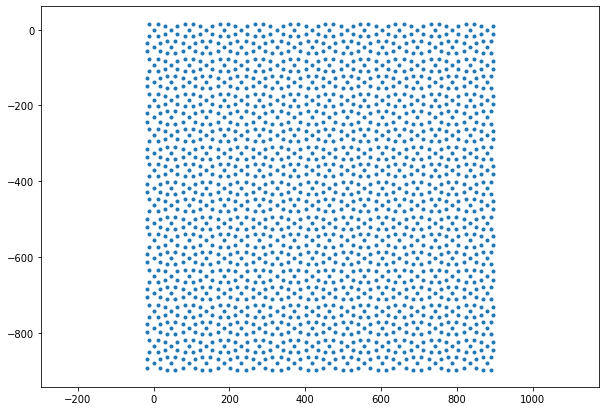

In [51]:
fig, ax1 = plt.subplots(figsize=(10,7))
plt.plot(col_trj.loc[0].x, col_trj.loc[0].y, '.')
plt.axis('equal')

In [80]:
arr = df[['x', 'y']].to_numpy()

In [81]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(arr)

In [130]:
vor.point_region

array([345, 355,  53, ..., 424, 154, 155])

In [139]:
vor.vertices.ndim

2

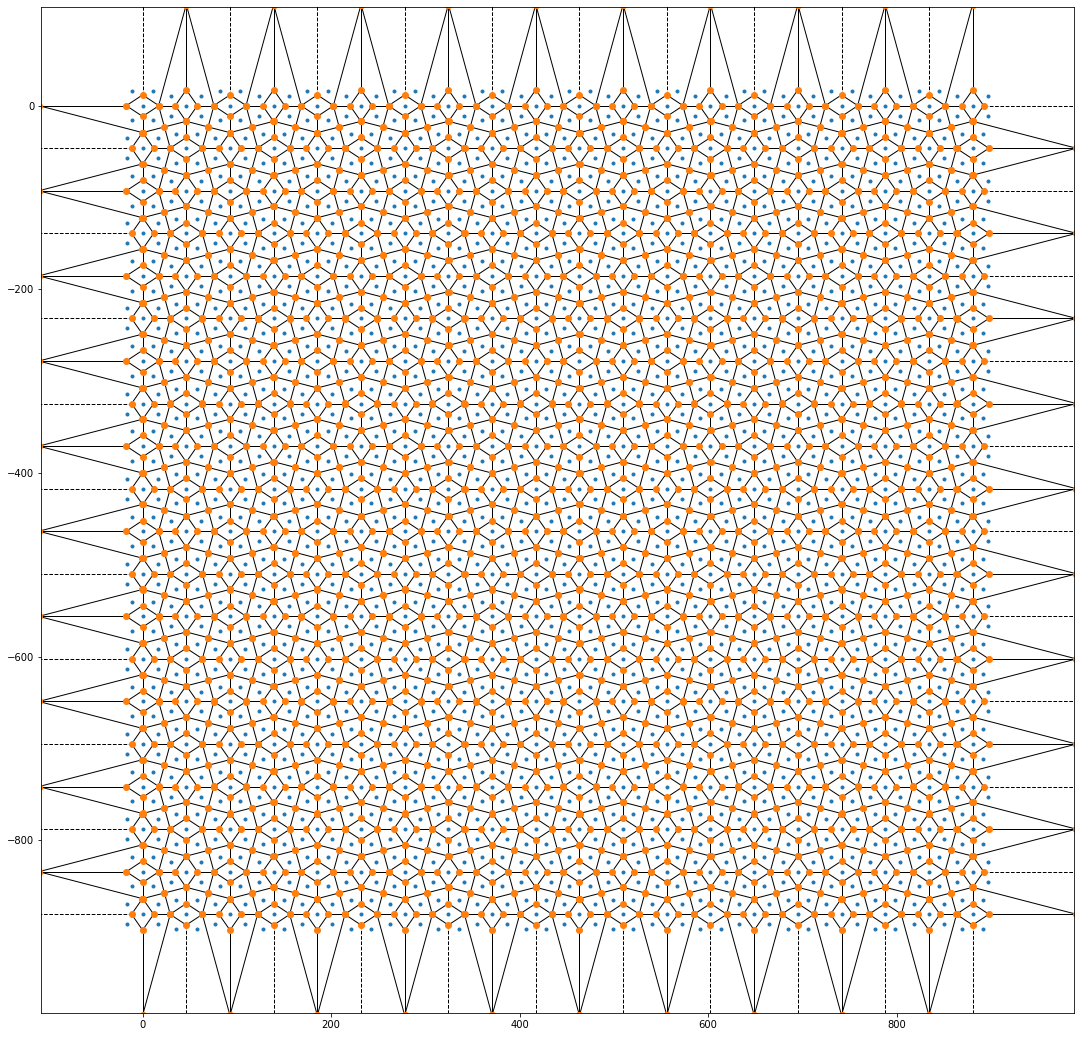

In [107]:

fig = voronoi_plot_2d(vor)
fig.set_size_inches(18.5, 18.5)


In [58]:
df

,type,x,y,z,dx,dy,dz,cx,cy,cz
id,,,,,,,,,,
0,2,10.865500,16.046101,0.0,8.66025,5.00000,0.0,3.905700,2.291599,0.0
1,2,-10.865500,16.046101,0.0,8.66025,-5.00000,-0.0,4.269970,-2.260301,0.0
2,2,10.865500,-16.046101,0.0,8.66025,-5.00000,0.0,3.944400,-2.607899,0.0
3,2,-10.865500,-16.046101,0.0,8.66025,5.00000,-0.0,1.945300,1.062501,0.0
4,2,30.305901,10.865500,0.0,5.00000,-8.66025,-0.0,1.185799,-1.948200,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,3,787.984009,-880.687988,0.0,-0.00000,-4.52580,-0.0,0.039978,-2.437988,0.0
1996,3,834.335999,-834.335999,0.0,-0.00000,-4.52580,-0.0,0.228027,-1.731995,0.0
1997,3,880.687988,-834.335999,0.0,4.52580,0.00000,0.0,2.564026,-0.286987,0.0


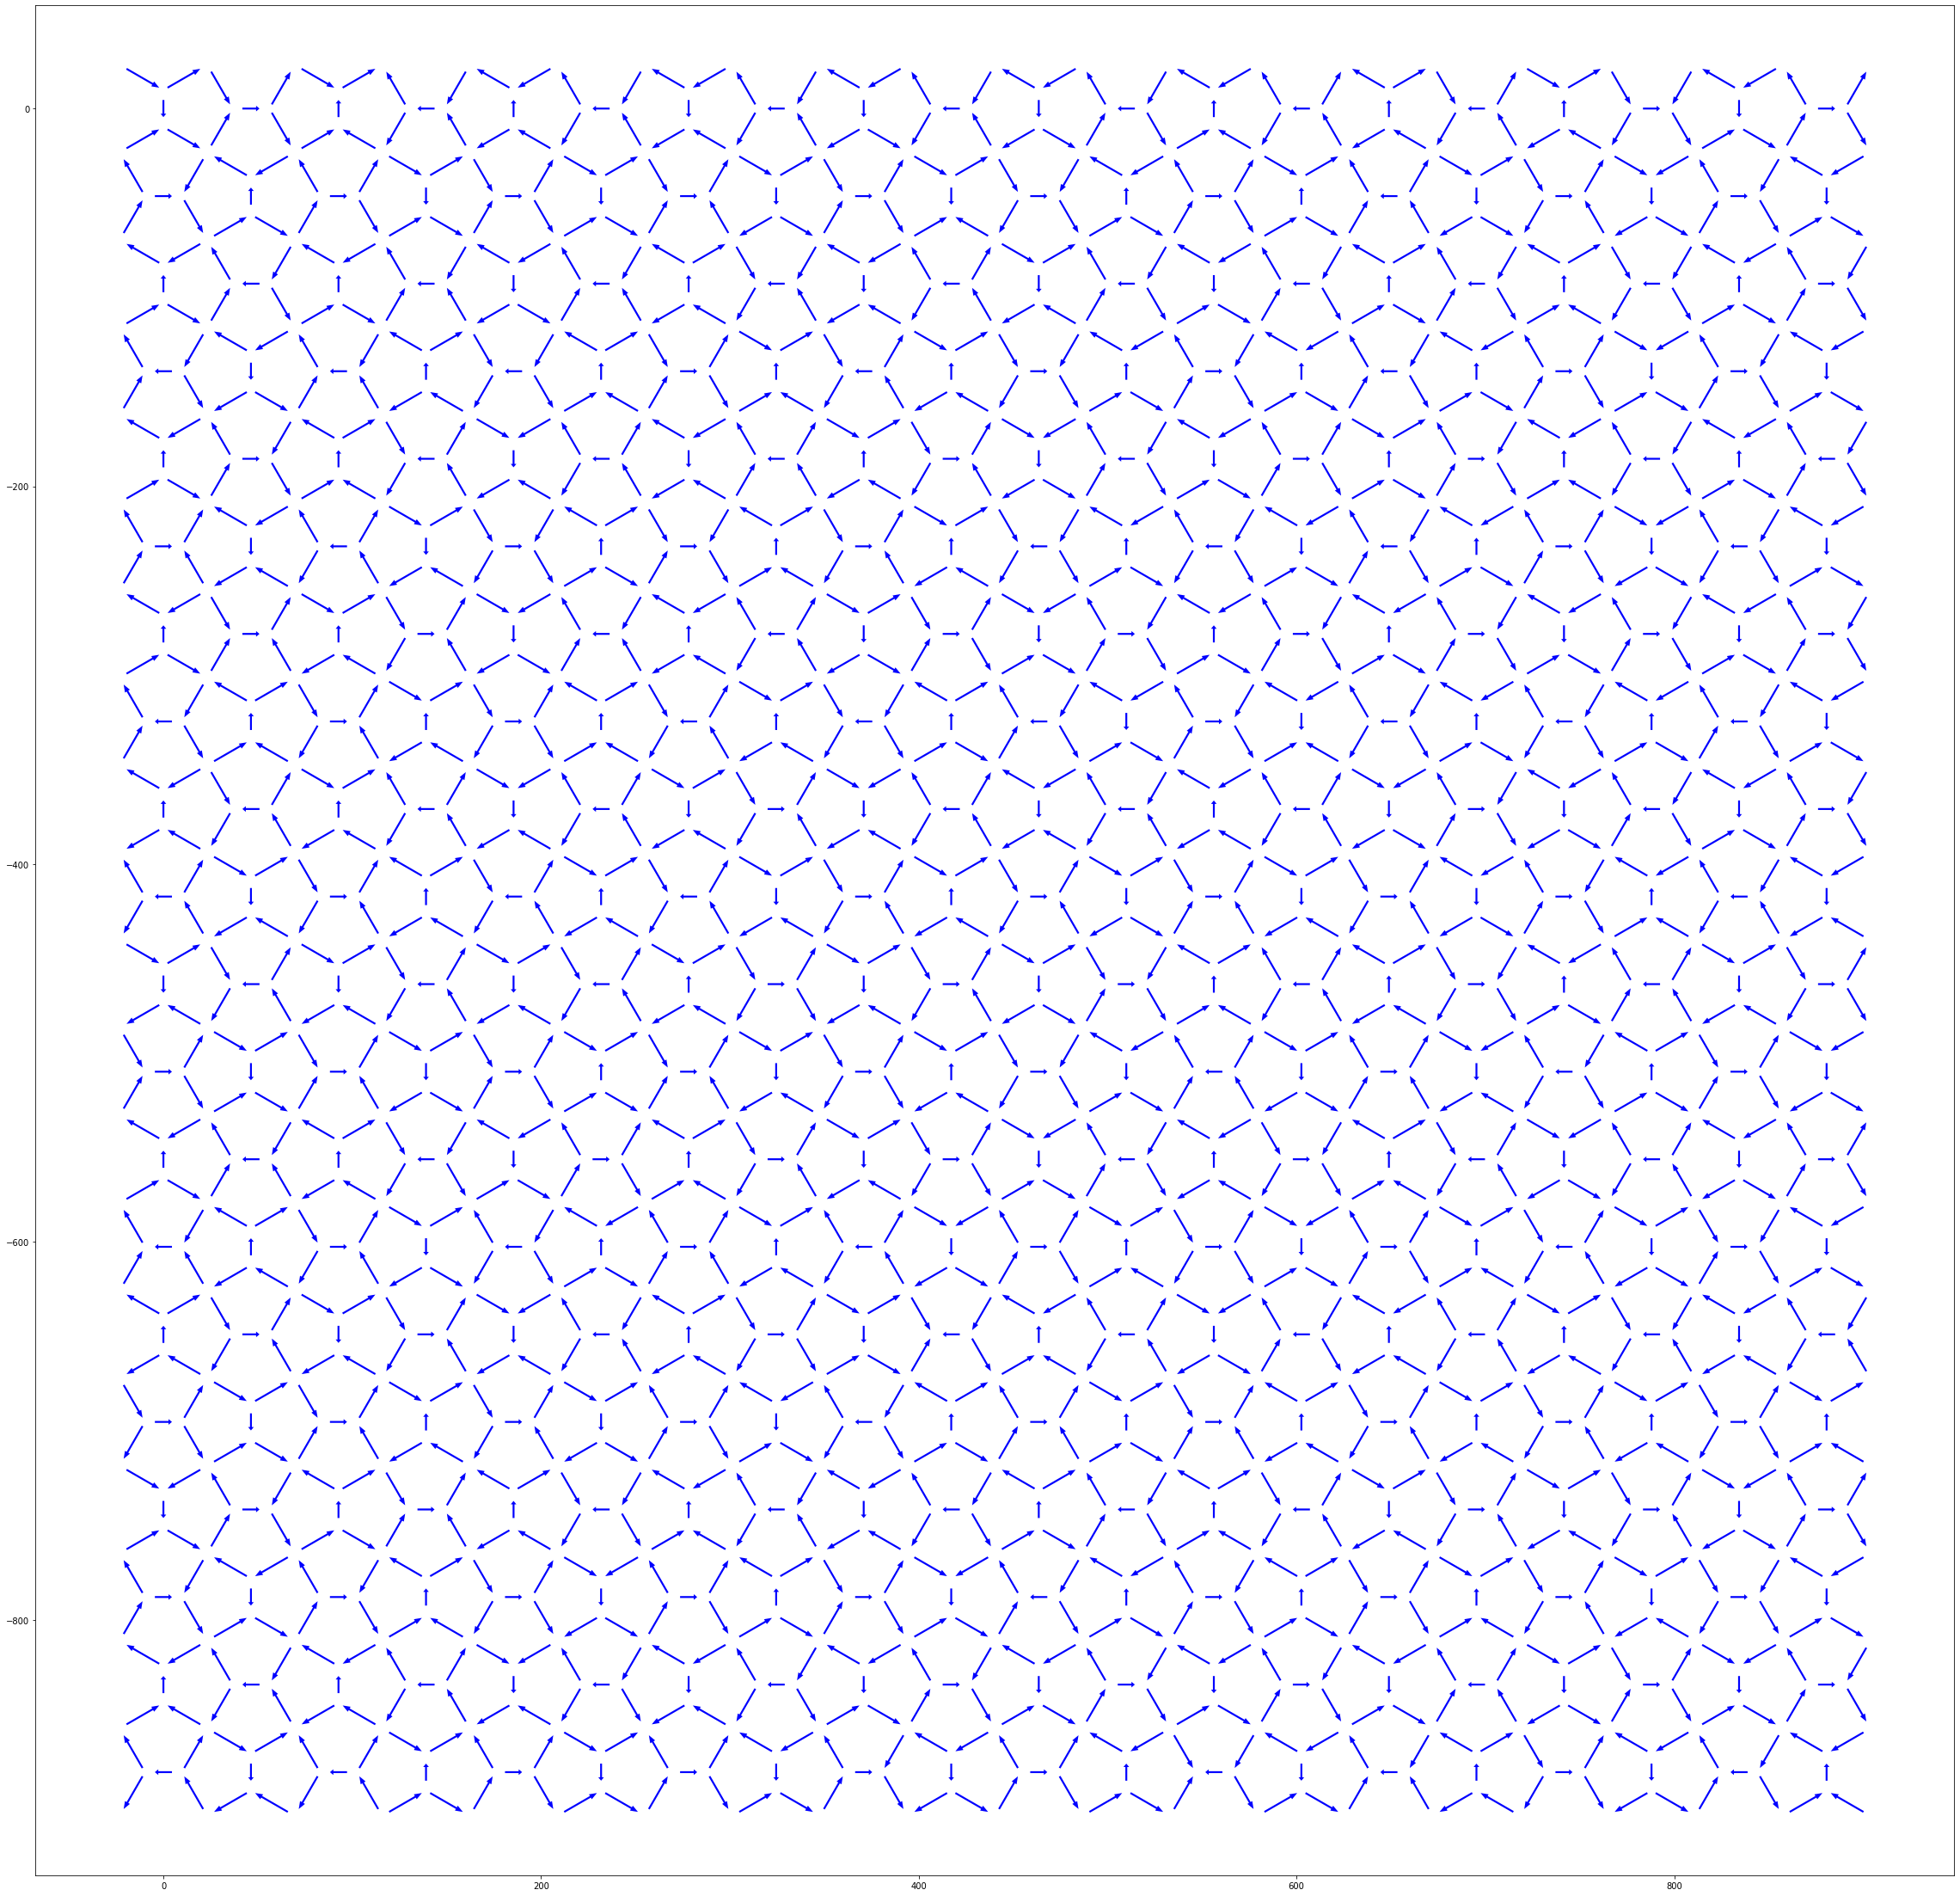

In [57]:
fig, ax1 = plt.subplots(figsize=(40,40))
for index, row in df.iterrows():
    
    ax1.add_patch(patches.Arrow(row.x-row.dx,row.y-row.dy,2*row.dx,2*row.dy,width=5,fc='b'))
    

#plt.ylim(-20,-100)
plt.axis('equal')
#plt.xlim(-20,100)
plt.savefig('spinconf.png')

In [157]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],

                   [2, 0], [2, 1], [2, 2], [3, 0], [3, 1], [3, 2]])

from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(points)

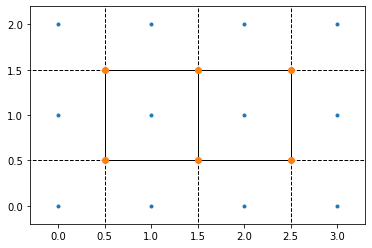

In [158]:
import matplotlib.pyplot as plt

fig = voronoi_plot_2d(vor)

plt.show()

In [159]:
vor.points

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [1., 0.],
       [1., 1.],
       [1., 2.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [3., 0.],
       [3., 1.],
       [3., 2.]])

In [160]:
vor.vertices

array([[0.5, 0.5],
       [0.5, 1.5],
       [2.5, 0.5],
       [1.5, 0.5],
       [2.5, 1.5],
       [1.5, 1.5]])

In [161]:
vor.ridge_points

array([[ 1,  2],
       [ 1,  0],
       [ 1,  4],
       [ 6,  3],
       [ 6,  9],
       [ 6,  7],
       [ 3,  0],
       [ 3,  4],
       [ 9, 10],
       [ 8,  5],
       [ 8, 11],
       [ 8,  7],
       [ 5,  2],
       [ 5,  4],
       [11, 10],
       [ 7, 10],
       [ 7,  4]], dtype=int32)

In [162]:
vor.ridge_vertices

[[-1, 1],
 [-1, 0],
 [0, 1],
 [-1, 3],
 [-1, 2],
 [2, 3],
 [-1, 0],
 [0, 3],
 [-1, 2],
 [-1, 5],
 [-1, 4],
 [4, 5],
 [-1, 1],
 [1, 5],
 [-1, 4],
 [2, 4],
 [3, 5]]

In [163]:
vor.regions

[[],
 [1, -1, 0],
 [3, -1, 2],
 [3, -1, 0],
 [-1, 2],
 [-1, 0],
 [5, -1, 4],
 [5, -1, 1],
 [-1, 4],
 [5, 3, 2, 4],
 [-1, 1],
 [4, -1, 2],
 [5, 1, 0, 3]]

In [156]:
vor.point_region

array([1, 3, 2, 8, 7, 9, 6, 4, 5])